# GROUP 2
### Members: Alvin Han, Koh Jia Xiang, Koh Bao Wen, Hao Shen, Wong Jing Yi, Sanjay Sajeev

## import package

In [4]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud  # Is not installed.
import matplotlib.pyplot as plt

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import seaborn as sns

## load article

In [5]:
myWords =[]

f = open('CS.txt', 'r',encoding='utf-8')
data=f.read()

In [6]:
Mywords=nltk.word_tokenize(data)

In [7]:
All_Words=nltk.FreqDist(Mywords)

## to separate article into words
## count the total number of each word that appears

In [8]:
All_Words

FreqDist({',': 714, 'the': 660, '.': 491, 'of': 439, 'and': 421, 'to': 320, 'a': 300, 'in': 206, 'that': 199, 'is': 186, ...})

## add in the stopwords filtered to get the importance words

In [10]:
mylists={"(", "The", ",", ".", "'", ")"}        #update the stopwords list to remove unwanted data
stop_words = set(stopwords.words('english'))    #changing the language preference
stop_words.update(mylists)                      #update the current list and data 
filtered_sentence = [w for w in Mywords if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in Mywords:                               #including new words if words in Mywords is not found
    if w not in stop_words: 
        filtered_sentence.append(w)  
   
print(filtered_sentence)                        #print the updated filtered sentence

['Computer', 'science', 'Computer', 'science', 'study', 'computers', 'computing', 'including', 'theoretical', 'algorithmic', 'foundations', 'hardware', 'software', 'uses', 'processing', 'information', 'discipline', 'computer', 'science', 'includes', 'study', 'algorithms', 'data', 'structures', 'computer', 'network', 'design', 'modeling', 'data', 'information', 'processes', 'artificial', 'intelligence', 'Computer', 'science', 'draws', 'foundations', 'mathematics', 'engineering', 'therefore', 'incorporates', 'techniques', 'areas', 'queueing', 'theory', 'probability', 'statistics', 'electronic', 'circuit', 'design', 'Computer', 'science', 'also', 'makes', 'heavy', 'use', 'hypothesis', 'testing', 'experimentation', 'conceptualization', 'design', 'measurement', 'refinement', 'new', 'algorithms', 'information', 'structures', 'computer', 'architectures', 'Computer', 'science', 'considered', 'part', 'family', 'five', 'separate', 'yet', 'interrelated', 'disciplines', ':', 'computer', 'engineeri

In [11]:
Importance_words=nltk.FreqDist(filtered_sentence) #creating a variable to store the highest number of words

In [12]:
print("\nMost frequent top-10 words: ", Importance_words.most_common(10)) # get the top 10 frequently used words


Most frequent top-10 words:  [('computer', 118), ('data', 88), ('systems', 66), ('software', 55), ('development', 48), ('system', 45), ('science', 43), ('design', 43), ('information', 41), ('memory', 41)]


In [13]:
Importance_words

FreqDist({'computer': 118, 'data': 88, 'systems': 66, 'software': 55, 'development': 48, 'system': 45, 'science': 43, 'design': 43, 'information': 41, 'memory': 41, ...})

In [15]:
filt_word={}
for Wrd, Cnt in Importance_words.items():
    #print(Wrd,Cnt)
    if len(Wrd) > 10:
        filt_word[Wrd]=Cnt

In [16]:
wcloud=WordCloud().generate_from_frequencies(filt_word)

In [18]:
wcloud.background_color='black'

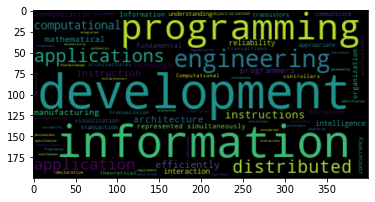

In [19]:
plt.imshow(wcloud, interpolation='bilinear')
#plt.axis("off")
plt.axis("on")
(-1.5, 300, 200, -2.5)
plt.show()

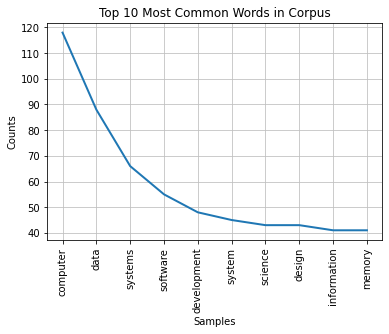

<AxesSubplot:title={'center':'Top 10 Most Common Words in Corpus'}, xlabel='Samples', ylabel='Counts'>

In [20]:
Importance_words.plot(10, title='Top 10 Most Common Words in Corpus')

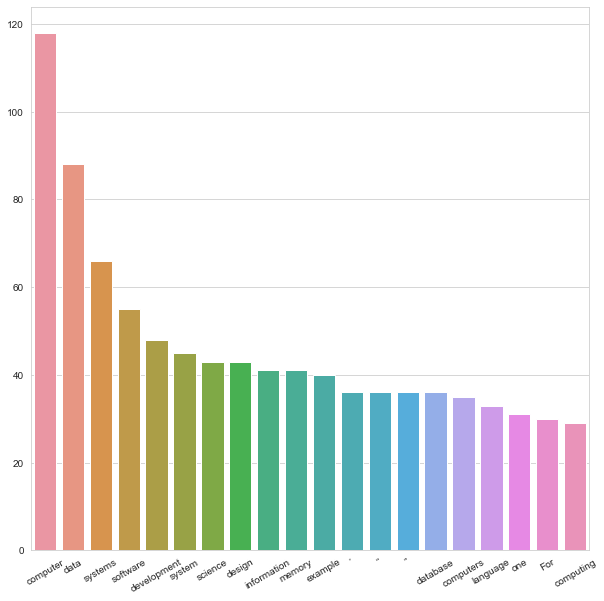

In [21]:
sns.set_style('whitegrid')
top_10_words = nltk.FreqDist(filtered_sentence).most_common(20)
top_10_words = pd.Series(dict(top_10_words))
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=top_10_words.index, y=top_10_words.values, ax=ax)
plt.xticks(rotation=30);